# Лабораторная работа №5 
# Приближённое решение задачи Коши для обыкновенного дифференциального уравнения

Методами Эйлера, Рунге -- Кутта четвертого порядка точности и методом Адамса третьего порядка найти приближенное решение задачи Коши для обыкновенного дифференциального уравнения на отрезке [0, 1]. Шаг сетки h = 0.05. начало расчета -- точка x = 0. Используя расчет на грубой сетке h = 0.1, найти оценку точности по Рунге для половины узлов подробной сетки (только для решения, полученного с четвертым порядком точности по методу Рунге -- Кутты). Для сравнения приведено точное решение u0(x).

Вариант 18

$$ u'' + (\tanh{x})u' + \frac{1}{\cosh^2{x}}u = -2\tanh{x} - \frac{2x}{\cosh^2{x}} $$

$$u(0) = 1,\quad u'(0) = -2$$
\
\
$$Exact\ solution$$
$$u_0(x) = \frac{1}{\cosh{x}}-2x$$

In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
a = 0 # interval start
b = 1 # interval end
h = 0.05 # step
h_rough = 0.1 # rough step

In [62]:
def exact_solution(x):
    return (1/np.cosh(x)) - 2*x

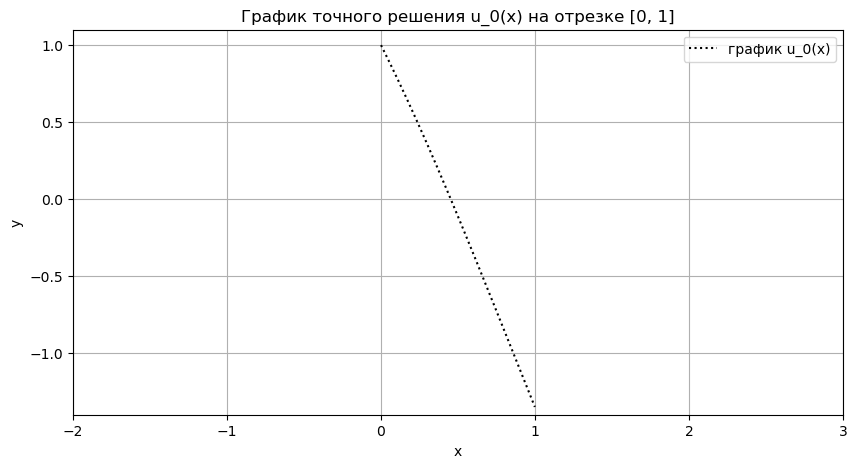

In [63]:
fig = plt.figure(figsize=(13,5)) 
# graph f(x)
x = np.arange(a, b, 0.001)
y = exact_solution(x)

# graph f(x)
plt.plot(x, y, ':', color="black", label="график u_0(x)")
plt.title(f'График точного решения u_0(x) на отрезке [0, 1]')
plt.xlim(a - 2, b + 2)
plt.ylim(-1.4 , 1.1)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend(loc="upper right")
plt.show()

In [64]:
# u = y1
# u' = y2

# y1' = y2
# y2' = -2th(x) - 2x/(ch(x))^2 - th(x)*y2 - (1/(ch(x))^2)*y1

In [65]:
# u = y1; y1 = y[0]
# u' = y2; y2 = y[1]

def system(x, y):
    result = np.zeros((len(y), 1))
    result[0] = y[1]
    result[1] = -2*np.tanh(x) - (2*x)/(np.cosh(x)**2) - np.tanh(x)*y[1] - (1/(np.cosh(x))**2)*y[0]
    return result

# Метод Эйлера

In [77]:
def euler(system, a, b, h, y0):
    xrange = np.arange(a, b, h)
    solution = np.zeros((len(y0), len(xrange)))
    solution[:, 0] = y0[:, 0]
    for i in range(1, len(xrange)):
        x = xrange[i - 1]
        solution[:, i] = solution[:, i - 1] + h * system(x, solution[:, i - 1])[:, 0]
    return solution

# Метод Рунге - Кутты 4го порядка точности

In [78]:
def runge_kutta4(system, a, b, h, y0):
    xrange = np.arange(a, b, h)
    result = np.zeros((len(y0), len(xrange)))
    result[:, 0] = y0[:, 0]
    for i in range(1, len(xrange)):
        x = xrange[i - 1]
        k1 = system(x, result[:, i - 1])[:, 0]
        k2 = system(x + h/2, result[:, i - 1] + h*k1/2)[:, 0]
        k3 = system(x + h/2, result[:, i - 1] + h*k2/2)[:, 0]
        k4 = system(x + h, result[:, i - 1] + h*k3)[:, 0]
        result[:, i] = result[:, i - 1] + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return result

# Метод Адамса 3го порядка

In [82]:
def adams3(system, a, b, h, y0):
    xrange = np.arange(a, b, h)
    result = np.zeros((len(y0), len(xrange)))
    result[:, 0:3] = runge_kutta4(system, a, a + 3 * h, h, y0)[:, 0:3]
    for i in range(3, len(xrange)):
        prev1 = system(xrange[i - 1], result[:, i - 1])[:, 0]
        prev2 = system(xrange[i - 2], result[:, i - 2])[:, 0]
        prev3 = system(xrange[i - 3], result[:, i - 3])[:, 0]
        result[:, i] = result[:, i - 1] + h * ((23/12) * prev1 - (16/12) * prev2 + (5/12) * prev3)
    return result

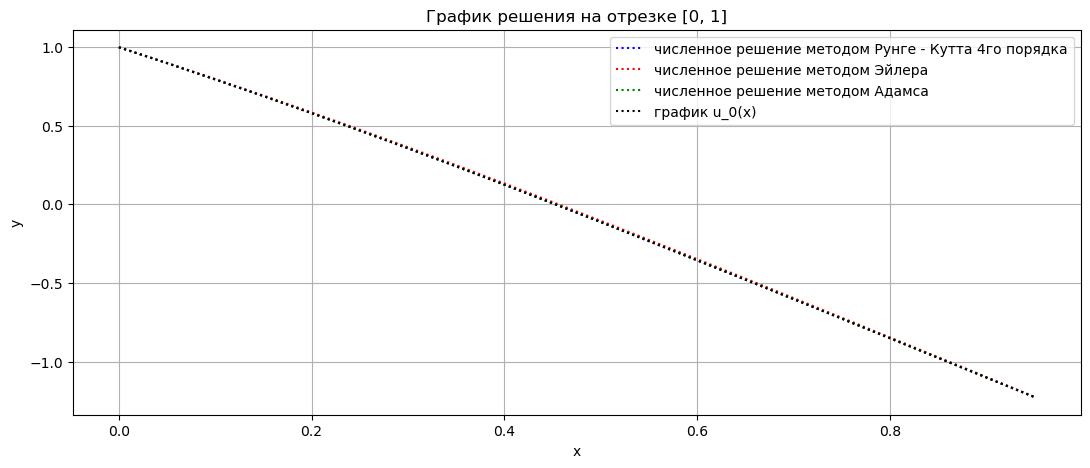

In [93]:
fig = plt.figure(figsize=(13,5)) 
# graph f(x)
y0 = np.array([[1], [-2]])

step = 0.05

x = np.arange(a, b, step)
y = exact_solution(x)

# graph f(x)
plt.plot(x, runge_kutta4(system, a, b, step, y0)[0, :], ':', color="blue", label="численное решение методом Рунге - Кутта 4го порядка")
plt.plot(x, euler(system, a, b, step, y0)[0, :], ':', color="red", label="численное решение методом Эйлера")
plt.plot(x, adams3(system, a, b, step, y0)[0, :], ':', color="green", label="численное решение методом Адамса")
plt.plot(x, y, ':', color="black", label="график u_0(x)")
plt.title(f'График решения на отрезке [0, 1]')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend(loc="upper right")
plt.show()

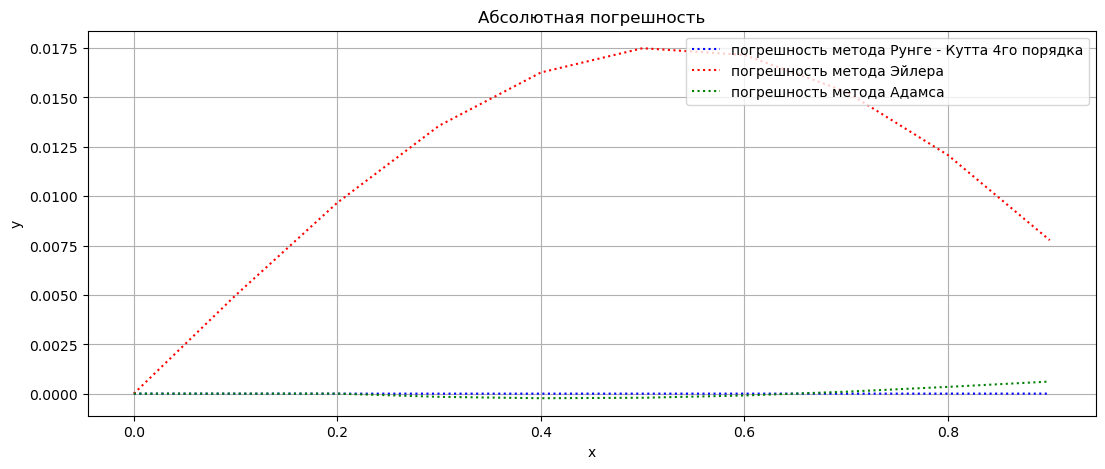

In [101]:
fig = plt.figure(figsize=(13,5)) 
# graph f(x)
y0 = np.array([[1], [-2]])

step = 0.1

x = np.arange(a, b, step)
y = exact_solution(x)

# graph f(x)
plt.plot(x, runge_kutta4(system, a, b, step, y0)[0, :] - y, ':', color="blue", label="погрешность метода Рунге - Кутта 4го порядка")
plt.plot(x, euler(system, a, b, step, y0)[0, :] - y, ':', color="red", label="погрешность метода Эйлера")
plt.plot(x, adams3(system, a, b, step, y0)[0, :] - y, ':', color="green", label="погрешность метода Адамса")
plt.title(f'Абсолютная погрешность')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend(loc="upper right")
plt.show()

Зависимость логарифма погрешности от логарифма шага сетки

In [102]:
steps = [10**i for i in range(-5, 0, 1)]
print("Steps: " + str(steps) + "\n")



Steps: [1e-05, 0.0001, 0.001, 0.01, 0.1]



[1e-05, 0.0001, 0.001, 0.01, 0.1]


Text(0.5, 0.98, 'Погрешности u(x)')

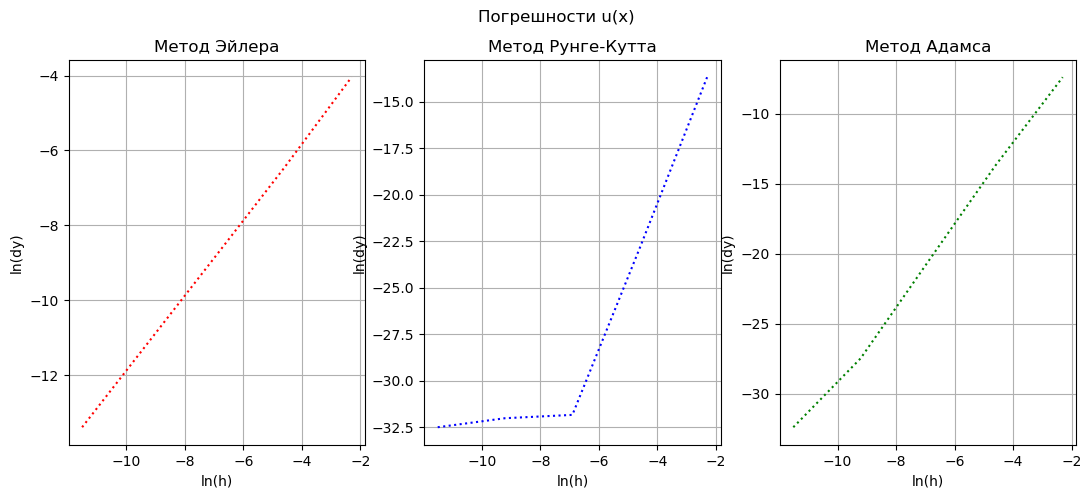

In [104]:
steps = [10**i for i in range(-5, 0, 1)]

dy_euler = list()
dy_runge = list()
dy_adams = list()



for step in steps:  
    x = np.arange(a, b, step)
    y = exact_solution(x)

    y_euler = euler(system, a, b, step, y0)[0, :]
    y_runge = runge_kutta4(system, a, b, step, y0)[0, :]
    y_adams = adams3(system, a, b, step, y0)[0, :]
    
    dy_euler.append(max(abs(y-y_euler)))
    dy_runge.append(max(abs(y-y_runge)))
    dy_adams.append(max(abs(y-y_adams)))
    
print(steps)

fig, axs = plt.subplots(1, 3, figsize=(13,5))

axs[0].plot(np.log(steps), np.log(dy_euler), ':', color='red', label="Эйлер")
axs[0].set_title("Метод Эйлера")
axs[0].set_xlabel('ln(h)')
axs[0].set_ylabel('ln(dy)')
axs[0].grid(True)

axs[1].plot(np.log(steps), np.log(dy_runge), ':', color='blue', label="Рунге-Кутта")
axs[1].set_title("Метод Рунге-Кутта")
axs[1].set_xlabel('ln(h)')
axs[1].set_ylabel('ln(dy)')
axs[1].grid(True)


axs[2].plot(np.log(steps), np.log(dy_adams), ':', color='green', label="Адамс")
axs[2].set_title("Метод Адамса")
axs[2].set_xlabel('ln(h)')
axs[2].set_ylabel('ln(dy)')
axs[2].grid(True)

fig.suptitle(f"Погрешности u(x)")
